![](https://raw.githubusercontent.com/wandb/wandb/508982e50e82c54cbf0dd464a9959fee0e1740ad/.github/wb-logo-lightbg.png)
<!--- @wandbcode{dataval-course-00} -->

In [1]:
from dataval.dataset import WeatherDataset
from dataval.plot import violinplot

import matplotlib
import os
import pandas as pd
import seaborn as sns

import wandb

os.environ["WANDB_QUIET"] = "true" # Let's keep the output clean

# Let's start a new W&B run to track our work
run = wandb.init(project="ml-dataval-tutorial")

In [2]:
ds = WeatherDataset(os.path.join(os.getcwd(), "canonical-paritioned-dataset"))

# Explore Data

Appendix C.2 has the description of features: https://arxiv.org/pdf/2107.07455.pdf. We'll mainly explore the first partition.

In [3]:
print(ds.get_partition_keys())

['2018_35', '2018_36', '2018_37', '2018_38', '2018_39', '2018_40', '2018_41', '2018_42', '2018_43', '2018_44', '2018_45', '2018_46', '2018_47', '2018_48', '2018_49', '2018_50', '2018_51', '2018_52', '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06', '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12', '2019_13', '2019_14']


In [4]:
len(ds.get_partition_keys())

32

In [5]:
df = ds.load(ds.get_partition_keys()[0])
df.head()

# Let's log a sample of the data to W&B Tables
wandb.log({"sample": wandb.Table(dataframe=df.head())})

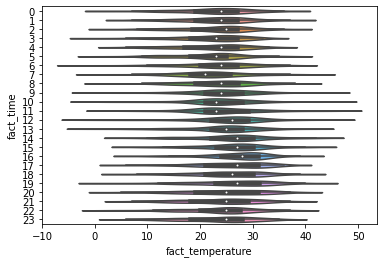

In [6]:
plot = violinplot(df, "fact_temperature", "hour")
wandb.log({"fact_temperature": wandb.Image(plot.figure)})

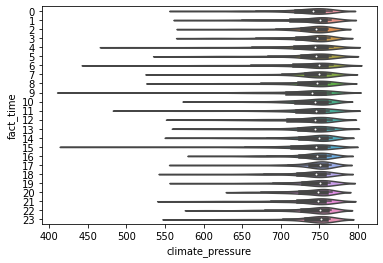

In [7]:
plot = violinplot(df, "climate_pressure", "hour")
wandb.log({"climate_pressure": wandb.Image(plot.figure)})

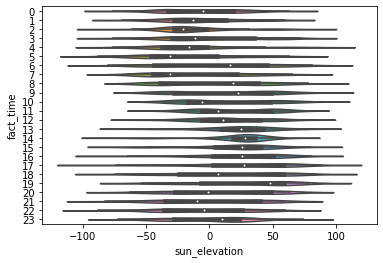

In [8]:
plot = violinplot(df, "sun_elevation", "hour")
wandb.log({"sun_elevation": wandb.Image(plot.figure)})

In [9]:
# We can finish now the W&B run
run.finish()